# Emission processing
Developed by Alejandro Delgado with the support of Mario Gavidia and Noelia.

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

Open NETCDF files

In [2]:
# First domain:
i_d01 = ['wrfchemi_00z_d01_ind' , 'wrfchemi_12z_d01_ind' ]
v_d01 = ['wrfchemi_00z_d01_veic', 'wrfchemi_12z_d01_veic']
r_d01 = ['wrfchemi_00z_d01_res' , 'wrfchemi_12z_d01_res' ]
t_d01 = ['wrfchemi_00z_d01_total.nc','wrfchemi_12z_d01_total.nc']

# Second domain
i_d02 = ['wrfchemi_00z_d02_ind' , 'wrfchemi_12z_d02_ind' ]
v_d02 = ['wrfchemi_00z_d02_veic', 'wrfchemi_12z_d02_veic']
r_d02 = ['wrfchemi_00z_d02_res' , 'wrfchemi_12z_d02_res' ]
t_d02 = ['wrfchemi_00z_d02_total.nc','wrfchemi_12z_d02_total.nc']

bio   = ['wrfbiochemi_d01','wrfbiochemi_d02']

def readnc(path = '/Volumes/passport/Dissertation/data/wrfchemis/exp10_oct/', file= i_d01[0]):
    fnc = path+file
    print('Reading ', fnc)
    ncfile = xr.open_dataset(fnc)
    return ncfile

# D01
ind_00z_d01 = readnc(file=i_d01[0])
ind_12z_d01 = readnc(file=i_d01[1])
vei_00z_d01 = readnc(file=v_d01[0])
vei_12z_d01 = readnc(file=v_d01[1])
res_00z_d01 = readnc(file=r_d01[0])
res_12z_d01 = readnc(file=r_d01[1])
tot_00z_d01 = readnc(file=t_d01[0])
tot_12z_d01 = readnc(file=t_d01[1])

# D02
ind_00z_d02 = readnc(file=i_d02[0])
ind_12z_d02 = readnc(file=i_d02[1])
vei_00z_d02 = readnc(file=v_d02[0])
vei_12z_d02 = readnc(file=v_d02[1])
res_00z_d02 = readnc(file=r_d02[0])
res_12z_d02 = readnc(file=r_d02[1])
tot_00z_d02 = readnc(file=t_d02[0])
tot_12z_d02 = readnc(file=t_d02[1])

bio_d01     = readnc(file=bio[0])
bio_d02     = readnc(file=bio[1])


Reading  /Volumes/passport/Dissertation/data/wrfchemis/exp10_oct/wrfchemi_00z_d01_ind
Reading  /Volumes/passport/Dissertation/data/wrfchemis/exp10_oct/wrfchemi_12z_d01_ind
Reading  /Volumes/passport/Dissertation/data/wrfchemis/exp10_oct/wrfchemi_00z_d01_veic
Reading  /Volumes/passport/Dissertation/data/wrfchemis/exp10_oct/wrfchemi_12z_d01_veic
Reading  /Volumes/passport/Dissertation/data/wrfchemis/exp10_oct/wrfchemi_00z_d01_res
Reading  /Volumes/passport/Dissertation/data/wrfchemis/exp10_oct/wrfchemi_12z_d01_res
Reading  /Volumes/passport/Dissertation/data/wrfchemis/exp10_oct/wrfchemi_00z_d01_total.nc
Reading  /Volumes/passport/Dissertation/data/wrfchemis/exp10_oct/wrfchemi_12z_d01_total.nc
Reading  /Volumes/passport/Dissertation/data/wrfchemis/exp10_oct/wrfchemi_00z_d02_ind
Reading  /Volumes/passport/Dissertation/data/wrfchemis/exp10_oct/wrfchemi_12z_d02_ind
Reading  /Volumes/passport/Dissertation/data/wrfchemis/exp10_oct/wrfchemi_00z_d02_veic
Reading  /Volumes/passport/Dissertation/d

In [3]:
# Checking shapes
print(ind_00z_d01.dims)
print(res_00z_d01.dims)
#print(vei_00z_d01.dims)

Frozen(SortedKeysDict({'Time': 12, 'south_north': 59, 'west_east': 89, 'emissions_zdim_stag': 1}))
Frozen(SortedKeysDict({'Time': 12, 'south_north': 59, 'west_east': 89, 'emissions_zdim_stag': 1}))


In [4]:
print(ind_12z_d02.dims)
print(res_12z_d02.dims)
#print(vei_12z_d01.dims)

Frozen(SortedKeysDict({'Time': 12, 'south_north': 120, 'west_east': 150, 'emissions_zdim_stag': 1}))
Frozen(SortedKeysDict({'Time': 12, 'south_north': 120, 'west_east': 150, 'emissions_zdim_stag': 1}))


We define species of emission rates:

## Biogenic emissions output from MEGAN2

In [5]:
bio_d01

<xarray.Dataset>
Dimensions:      (Time: 1, months_per_year_stag: 12, south_north: 59, west_east: 89)
Coordinates:
    XLONG        (Time, south_north, west_east) float32 ...
    XLAT         (Time, south_north, west_east) float32 ...
Dimensions without coordinates: Time, months_per_year_stag, south_north, west_east
Data variables:
    Times        (Time) |S19 ...
    MSEBIO_ISOP  (Time, south_north, west_east) float32 ...
    PFTP_BT      (Time, south_north, west_east) float32 ...
    PFTP_NT      (Time, south_north, west_east) float32 ...
    PFTP_SB      (Time, south_north, west_east) float32 ...
    PFTP_HB      (Time, south_north, west_east) float32 ...
    MLAI         (Time, months_per_year_stag, south_north, west_east) float32 ...
    MTSA         (Time, months_per_year_stag, south_north, west_east) float32 ...
    MSWDOWN      (Time, months_per_year_stag, south_north, west_east) float32 ...
Attributes:
    Title:                           MEGAN2 bio emissions
    History:                         Created on 2020-12-04 at 21:01
    Author:                          megan_bio_emiss
    TITLE:                            OUTPUT FROM REAL_EM V4.1.3 PREPROCESSOR
    START_DATE:                      2018-09-29_00:00:00
    SIMULATION_START_DATE:           2018-09-29_00:00:00
    WEST-EAST_GRID_DIMENSION:        90
    SOUTH-NORTH_GRID_DIMENSION:      60
    BOTTOM-TOP_GRID_DIMENSION:       35
    DX:                              15000.0
    DY:                              15000.0
    AERCU_OPT:                       0
    AERCU_FCT:                       1.0
    IDEAL_CASE:                      0
    DIFF_6TH_SLOPEOPT:               0
    AUTO_LEVELS_OPT:                 2
    DIFF_6TH_THRESH:                 0.1
    DZBOT:                           50.0
    DZSTRETCH_S:                     1.3
    DZSTRETCH_U:                     1.1
    GRIDTYPE:                        C
    DIFF_OPT:                        1
    KM_OPT:                          4
    DAMP_OPT:                        0
    DAMPCOEF:                        0.01
    KHDIF:                           0.0
    KVDIF:                           0.0
    MP_PHYSICS:                      10
    RA_LW_PHYSICS:                   1
    RA_SW_PHYSICS:                   4
    SF_SFCLAY_PHYSICS:               1
    SF_SURFACE_PHYSICS:              2
    BL_PBL_PHYSICS:                  8
    CU_PHYSICS:                      5
    SF_LAKE_PHYSICS:                 0
    SURFACE_INPUT_SOURCE:            1
    SST_UPDATE:                      0
    GRID_FDDA:                       0
    GFDDA_INTERVAL_M:                0
    GFDDA_END_H:                     0
    GRID_SFDDA:                      0
    SGFDDA_INTERVAL_M:               0
    SGFDDA_END_H:                    0
    HYPSOMETRIC_OPT:                 2
    USE_THETA_M:                     0
    USE_MAXW_LEVEL:                  0
    USE_TROP_LEVEL:                  0
    GWD_OPT:                         0
    SF_URBAN_PHYSICS:                0
    SF_SURFACE_MOSAIC:               0
    SF_OCEAN_PHYSICS:                0
    SIMULATION_INITIALIZATION_TYPE:  REAL-DATA CASE
    WEST-EAST_PATCH_START_UNSTAG:    1
    WEST-EAST_PATCH_END_UNSTAG:      89
    WEST-EAST_PATCH_START_STAG:      1
    WEST-EAST_PATCH_END_STAG:        90
    SOUTH-NORTH_PATCH_START_UNSTAG:  1
    SOUTH-NORTH_PATCH_END_UNSTAG:    59
    SOUTH-NORTH_PATCH_START_STAG:    1
    SOUTH-NORTH_PATCH_END_STAG:      60
    BOTTOM-TOP_PATCH_START_UNSTAG:   1
    BOTTOM-TOP_PATCH_END_UNSTAG:     34
    BOTTOM-TOP_PATCH_START_STAG:     1
    BOTTOM-TOP_PATCH_END_STAG:       35
    GRID_ID:                         1
    PARENT_ID:                       1
    I_PARENT_START:                  1
    J_PARENT_START:                  1
    PARENT_GRID_RATIO:               1
    DT:                              40.0
    CEN_LAT:                         -23.570007
    CEN_LON:                         -46.61
    TRUELAT1:                        -30.0
    TRUELAT2:    

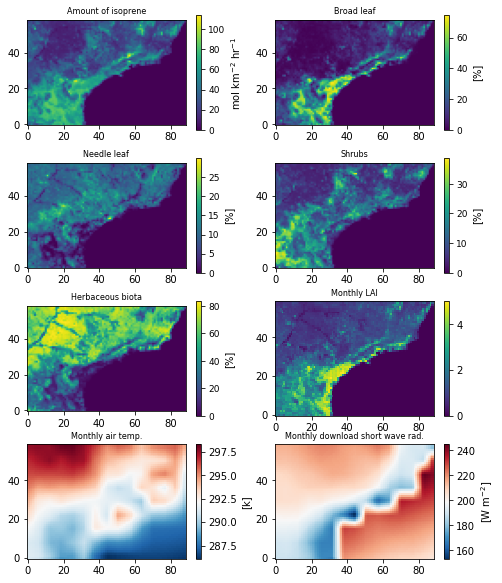

In [6]:
var    = ['MSEBIO_ISOP','PFTP_BT','PFTP_NT','PFTP_SB','PFTP_HB','MLAI','MTSA','MSWDOWN']
label  = ['mol km$^{-2}$ hr$^{-1}$','[%]','[%]','[%]','[%]','','[k]','[W m$^{-2}$]']
titles = ['Amount of isoprene','Broad leaf','Needle leaf','Shrubs','Herbaceous biota','Monthly LAI',
         'Monthly air temp.','Monthly download short wave rad.']
fig = plt.figure(figsize=(2*4,4*2.5))
fig.subplots_adjust(hspace=0.25, wspace=0.25)
for i in range(1,9):
    if i < 6:
        ax = fig.add_subplot(4,2,i)
        bio = bio_d01[var[i-1]].isel(Time=0)
        plt.imshow(bio, cmap='viridis')
        plt.colorbar(label=label[i-1]).ax.tick_params(labelsize=9)
        plt.gca().invert_yaxis()
        plt.title(titles[i-1], fontsize=8)
    elif i == 6:
        ax = fig.add_subplot(4,2,i)
        bio_d01[var[i-1]].isel(Time=0)[8].plot(ax=ax,cmap='viridis',cbar_kwargs={'label': label[i-1]})
        ax.set_title(titles[i-1], fontsize=8)
        ax.set_ylabel('')
        ax.set_xlabel('')
    else:
        ax = fig.add_subplot(4,2,i)
        bio_d01[var[i-1]].isel(Time=0)[8].plot(ax=ax,cmap='RdBu_r',cbar_kwargs={'label': label[i-1]})
        ax.set_title(titles[i-1], fontsize=8)
        ax.set_ylabel('')
        ax.set_xlabel('')
#plt.colorbar(label=label[i-1]).ax.tick_params(labelsize=9)
fig.savefig('../4_Draft_Report/Dissertation/fig/biogenic_d01.pdf',bbox_inches='tight')

## Anthropogenic emissions
Anthropogenic emissions considered in the WRF-Chem model are (i) road transport, (ii) industry, and (iii) residential. Road transport emissions were calculated using LAPAt preprocessor based on bottom-up methodology. This tool distributes emissions over road length considering the traffic, generated by `wrfchemi_cbmz_fc.ncl` and used by Andrade et al. (2015). Last two sectors come from EDGAR datasets as reference to year 2010. Calibration factors are considered to enhance the representative of the emissions with observed results for October 2018. Two experiments were done called `Exp 09`and `Exp 10`.

**Exp 09**: fc_nox = 0.55, fc_c2h5oh = 0.3, fc_hcho= 0.3, fc_ald = 0.3, fc_voc = 0.3.

**Exp 10**: only fc_nox = 0.8

We concatenate two files with different hours as one using `concat` function in `xarray` module: 

In [6]:
ind_d01 = xr.concat([ind_00z_d01, ind_12z_d01], dim="Time")
ind_d02 = xr.concat([ind_00z_d02, ind_12z_d02], dim="Time")
res_d01 = xr.concat([res_00z_d01, res_12z_d01], dim="Time")
res_d02 = xr.concat([res_00z_d02, res_12z_d02], dim="Time")
vei_d01 = xr.concat([vei_00z_d01, vei_12z_d01], dim="Time")
vei_d02 = xr.concat([vei_00z_d02, vei_12z_d02], dim="Time")
tot_d01 = xr.concat([tot_00z_d01, tot_12z_d01], dim="Time")
tot_d02 = xr.concat([tot_00z_d02, tot_12z_d02], dim="Time")

In [7]:
anthro     = {'ind_d01':ind_d01,  'res_d01':res_d01,
              'road_d01':vei_d01, 'total_d01':tot_d01,
              'ind_d02':ind_d02,  'res_d02':res_d02,
              'road_d02':vei_d02, 'total_d02':tot_d02}

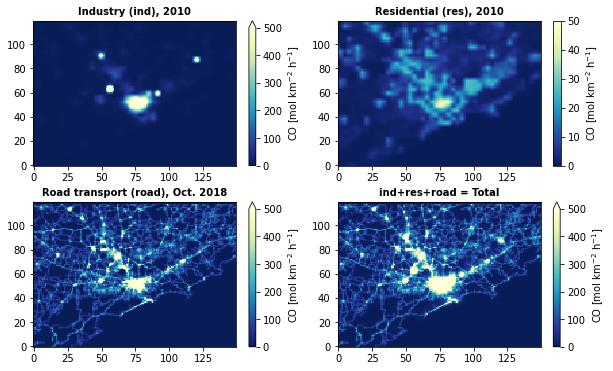

In [10]:
keys       = ['ind','res','road','total']
dom        = '_d02'     
hour       = 18 # 15 horas local time in Brazil
max_e      = 500 # mol km^-2 hr^-1
max_res    = 50  # mol km^-2 hr^-1
pol_label  = 'CO'
pol        = 'E_'+pol_label
Cmap       = 'YlGnBu_r'#'YlGnBu_r','jet','summer','RdYlBu_r','bwr','cividis','plasma','inferno','hot','Spectral_r' viridis
titles     = ['Industry (ind), 2010','Residential (res), 2010',
              'Road transport (road), Oct. 2018', 'ind+res+road = Total']

fig = plt.figure(figsize=(10,6))
fig.subplots_adjust(hspace=0.25, wspace=0.2)
for i in range(1,5):
    if i == 2:
        ax = fig.add_subplot(2,2,i)
        anthro[keys[i-1]+dom][pol].isel(Time=hour).plot(ax=ax,
                                                        vmax=max_res,
                                                        cmap=Cmap,
                                                        alpha=1,
                                                        cbar_kwargs={'label': pol_label+' [mol km$^{-2}$ h$^{-1}$]'})
        ax.set_title(titles[i-1], fontsize=10,loc='center', fontweight='bold')
        ax.set_ylabel('')
        ax.set_xlabel('')
    else:
        ax = fig.add_subplot(2,2,i)
        anthro[keys[i-1]+dom][pol].isel(Time=hour).plot(ax=ax,
                                                        vmax=max_e,
                                                        cmap=Cmap,
                                                        alpha=1,
                                                        cbar_kwargs={'label': pol_label+' [mol km$^{-2}$ h$^{-1}$]'})
        ax.set_title(titles[i-1], fontsize=10, loc='center', fontweight='bold')
        ax.set_ylabel('')
        ax.set_xlabel('')
fig.savefig(pol+'_emi'+dom+'_oct18.pdf', bbox_inches='tight', facecolor='w') #../4_Draft_Report/Dissertation/fig/

## Emissions in kt

In [11]:
def mol_kton(emi_file = anthro, sector = 'road',domain='d01',km2 = 15*15, pol = 'NO'):
    """
    Return wrfchemi emissions per hour to kt per year.
    
    Parameters:
    -----------
    emi_file = dict with xarray dataset corresponding to wrfchemis
    sector   = emission inventory sector
               str
    domain   = str
    km2      = cel area in km2
               integer
    pol      = pollutant
               str
    Returns:
    --------
    emission in kt/year
    """
    mol_w = {'CO':28,'NO':30,'NO2':46,'SO2':64,'NH3':17,'ISO':68.12,'ETH':30.07,
             'HC3':42.66,'HC5':60,'HC8':96,'XYL':104,'OL2':28.05,'OLT':56,'OLI':56,
             'TOL':92,'HCHO':30.09,'ALD':44.05,'KET':58.08,'CH3OH':70.09,'C2H5OH':46}
    res = (emi_file[sector+'_'+domain]['E_'+pol]*km2).sum().values*365*mol_w[pol]/10**9
    
    return res

def kton_all(emi_file = anthro, keys = ['ind','res','road','total'],domain='d01', km2=15*15):
    """
    Return DataFrame for all pollutants consider in wrfchemi for CBMZ.
    Parameters:
    -----------
    emi_file = dict with xarray dataset corresponding to wrfchemis
    keys     = sectors of emission inventory
               list of str
    domain   = modelling domain, i.e., 'd01'
               str
    km2      = cel area or spatial resolution in km^2
               number
    
    Returns:
    --------
    emi    = Emissions file as pandas DataFrame in units of kt per year.
    """
    emi  = {}
    polls = ['CO','NO', 'NO2','SO2','NH3','ISO','ETH','HC3','HC5','HC8',
             'XYL','OL2','OLT','OLI','TOL','HCHO','ALD','KET','CH3OH','C2H5OH']
    for p in polls:
        emi[p] = {i:mol_kton(emi_file = emi_file, sector = i,domain=domain,km2 = km2, pol = p)\
                  .round(2) for i in keys}
    emi = pd.DataFrame.from_dict(emi)
    emi['NOx']=emi.NO+emi.NO2
    emi = emi.T
    return emi

We have emissions in kt/year for each pollutant:

In [26]:
emi = {'d01':kton_all(keys = ['road','ind','res'],domain='d01', km2=15*15),
 'd02':kton_all(keys = ['road','ind','res'],domain='d02', km2=3*3)}
emi = pd.concat([emi['d01'],emi['d02']],axis=1,keys=['d01', 'd02']).T.iloc[:,[0,1,2,-1]+list(range(3,20))].T
emi

d01                       d02                
           road      ind     res     road     ind     res
CO      3216.73  3528.65  672.69  1416.55  510.65  191.80
NO       556.28   319.57   21.73   244.97  134.21    7.59
NO2       61.81    54.45    3.70    27.22   22.87    1.29
NOx      618.09   374.02   25.43   272.19  157.08    8.88
SO2       70.01   363.16   36.58    30.83  133.09   12.92
NH3       10.72    49.70    0.35     4.72   21.41    0.13
ISO        1.19     0.00    0.00     0.53    0.00    0.00
ETH       18.92    14.63    2.21     8.33    6.53    0.73
HC3      119.37    87.75   13.25    52.57   39.19    4.39
HC5      182.13   102.38   15.46    80.21   45.73    5.12
HC8      287.56   102.38   15.46   126.63   45.73    5.12
XYL      127.24    43.88    6.63    56.03   19.60    2.19
OL2       95.42   117.00   17.67    42.02   52.26    5.85
OLT      172.75   102.38   15.46    76.07   45.73    5.12
OLI      110.27    58.50    8.83    48.56   26.13    2.92
TOL      183.36    58.50    8.83    80.75   26.13    2.92
HCHO      64.17    73.13   11.04    28.26   32.66    3.66
ALD       86.94    58.50    8.83    38.29   26.13    2.92
KET        1.03     0.00    0.00     0.46    0.00    0.00
CH3OH      1.27     0.00    0.00     0.56    0.00    0.00
C2H5OH   902.34   643.51   97.18   397.36  287.42   32.17

In [25]:
emi.iloc[5:,:].sum()

d01  road    2364.68
     ind     1512.24
     res      221.20
d02  road    1041.35
     ind      674.65
     res       73.24
dtype: float64

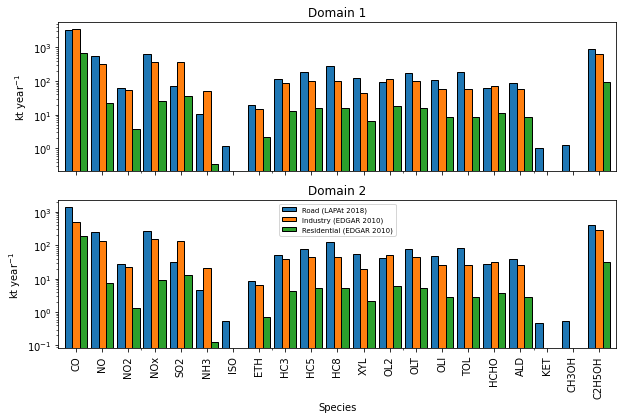

In [19]:
Cmap = 'Accent' #Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r
fig, ax = plt.subplots(2, figsize=(10,6),sharex=True, sharey=False,
                       gridspec_kw={'hspace':0.2,'wspace':0},
                       subplot_kw={'yscale':'log',
                                   'ylabel':'kt year$^{-1}$',
                                   'xlabel':'Species'})
kwarg = {'edgecolor':'k','width':0.85}
emi['d01'].iloc[0:,:].plot(kind='bar',stacked=False,ax=ax[0], legend=False, title='Domain 1',**kwarg)
emi['d02'].iloc[0:,:].plot(kind='bar',stacked=False,ax=ax[1], legend=True,  title='Domain 2',**kwarg)

ax[1].legend(['Road (LAPAt 2018)','Industry (EDGAR 2010)','Residential (EDGAR 2010)'], fontsize=7)
fig.savefig('fig/emi_kt_oct18.pdf',bbox_inches='tight', facecolor='w');

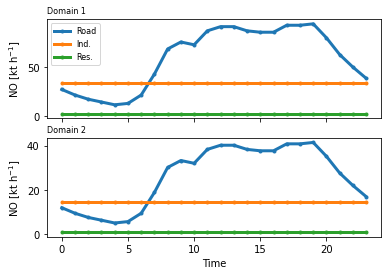

In [24]:
fig, ax = plt.subplots(2,sharex=True,gridspec_kw={'hspace':0.2,'wspace':0})
kwarg={'linewidth':3,'marker':'.'}
pol = 'NO'
mol_w = 28
(vei_d01['E_'+pol].sum(axis=1).sum(axis=1).sum(axis=1)*15*15*mol_w/10**6).plot(ax=ax[0],label='Road',**kwarg)
(ind_d01['E_'+pol].sum(axis=1).sum(axis=1).sum(axis=1)*15*15*mol_w/10**6).plot(ax=ax[0],label='Ind.',**kwarg)
(res_d01['E_'+pol].sum(axis=1).sum(axis=1).sum(axis=1)*15*15*mol_w/10**6).plot(ax=ax[0],label='Res.',**kwarg)
(vei_d02['E_'+pol].sum(axis=1).sum(axis=1).sum(axis=1)*3*3*mol_w/10**6).plot(ax=ax[1],**kwarg)
(ind_d02['E_'+pol].sum(axis=1).sum(axis=1).sum(axis=1)*3*3*mol_w/10**6).plot(ax=ax[1],**kwarg)
(res_d02['E_'+pol].sum(axis=1).sum(axis=1).sum(axis=1)*3*3*mol_w/10**6).plot(ax=ax[1],**kwarg)

ax[0].set_ylabel(pol+' [kt h$^{-1}$]')
ax[1].set_ylabel(pol+' [kt h$^{-1}$]')
ax[0].set_xlabel('')
ax[0].legend(fontsize=8)
ax[0].set_title('Domain 1',loc='left', fontsize=8)
ax[1].set_title('Domain 2',loc='left', fontsize=8)
fig.savefig('fig/emi_'+pol+'_time_kt_oct18.pdf',bbox_inches='tight', facecolor='w');


In [42]:
cetesb_2018 = pd.read_csv('emi_CETESB.csv',index_col=0) # emissions in kt/year based on september 2018
cetesb_2018

,São Paulo State,D01,D02
CO,314.847,629.295,270.628
NOx,147.680,295.173,126.939
SO2,4.353,8.700,3.742
MP,3.890,7.775,3.344
COV,66.828,133.571,57.442


In [45]:
emi

d01                       d02                
           road      ind     res     road     ind     res
CO      3205.76  3528.65  672.69  1412.29  510.65  191.80
NO       554.39   319.57   21.73   244.23  134.21    7.59
NO2       61.60    54.45    3.70    27.14   22.87    1.29
NOx      615.99   374.02   25.43   271.37  157.08    8.88
SO2       69.78   363.16   36.58    30.74  133.09   12.92
NH3       10.68    49.70    0.35     4.71   21.41    0.13
ISO        1.19     0.00    0.00     0.52    0.00    0.00
ETH       18.85    14.63    2.21     8.31    6.53    0.73
HC3      118.96    87.75   13.25    52.41   39.19    4.39
HC5      181.51   102.38   15.46    79.96   45.73    5.12
HC8      286.58   102.38   15.46   126.25   45.73    5.12
XYL      126.81    43.88    6.63    55.87   19.60    2.19
OL2       95.10   117.00   17.67    41.90   52.26    5.85
OLT      172.16   102.38   15.46    75.85   45.73    5.12
OLI      109.89    58.50    8.83    48.41   26.13    2.92
TOL      182.73    58.50    8.83    80.50   26.13    2.92
HCHO      63.95    73.13   11.04    28.17   32.66    3.66
ALD       86.65    58.50    8.83    38.17   26.13    2.92
KET        1.03     0.00    0.00     0.45    0.00    0.00
CH3OH      1.27     0.00    0.00     0.56    0.00    0.00
C2H5OH   899.26   643.51   97.18   396.17  287.42   32.17

In [77]:
name_1 = 'CETESB (Top-Down)'
name_2 = 'LAPAt (Bottom-up)'

emi_df={name_1:pd.DataFrame({'D01':{'CO':cetesb_2018.loc['CO','D01'],
                                    'NOx':cetesb_2018.loc['NOx','D01']},
                             'D02':{'CO':cetesb_2018.loc['CO','D02'],
                                    'NOx':cetesb_2018.loc['NOx','D02']} }),
        name_2:pd.DataFrame({'D01':{'CO':emi['d01'].loc['CO','road'],
                                    'NOx':emi['d01'].loc['NOx','road']},
                             'D02':{'CO':emi['d02'].loc['CO','road'],
                                    'NOx':emi['d02'].loc['NOx','road']}})}
emi_df = pd.concat([emi_df[name_1],emi_df[name_2]],axis=1,keys=[name_1, name_2])
emi_df

CETESB (Top-Down)          LAPAt (Bottom-up)         
                  D01      D02               D01      D02
CO            629.295  270.628           3205.76  1412.29
NOx           295.173  126.939            615.99   271.37

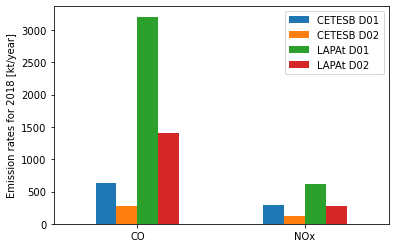

In [85]:
fig, ax = plt.subplots()
ax = emi_df.plot(kind='bar', ax=ax, rot=0)
ax.legend(['CETESB D01', 'CETESB D02', 'LAPAt D01','LAPAt D02'])
ax.set_ylabel('Emission rates for 2018 [kt/year]')
fig.savefig('Emi_CETESB_vs_LAPAt.pdf',bbox_inches='tight', facecolor='w');

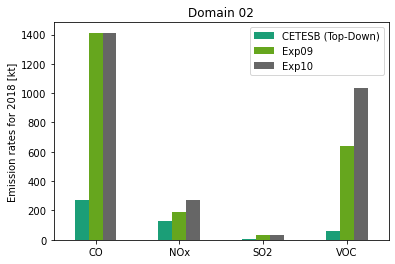

In [16]:
fig, ax = plt.subplots(1)
emi_df = pd.DataFrame({'CETESB (Top-Down)':{'CO':270.628,
                       'NOx':126.939,
                       'SO2':3.742,
                       'VOC':57.442},
             'Exp09'  :{'CO':1412.29,
                       'NOx':186.57,
                       'SO2':30.74,
                       'VOC':637.05},
             'Exp10'  :{'CO':1412.29,
                       'NOx':271.37,
                       'SO2':30.74,
                       'VOC':1038.21}})
emi_df.plot(kind='bar',title='Domain 02', ax=ax, cmap='Dark2', rot=0)
ax.set_ylabel('Emission rates for 2018 [kt]')
fig.savefig('../4_Draft_Report/Dissertation/fig/emi_compar.pdf',bbox_inches='tight');

In [17]:
emi_df.loc['NOx/VOC',:]=emi_df.loc['NOx',:]/emi_df.loc['VOC',:]
emi_df.round(2)

,CETESB (Top-Down),Exp09,Exp10
CO,270.63,1412.29,1412.29
NOx,126.94,186.57,271.37
SO2,3.74,30.74,30.74
VOC,57.44,637.05,1038.21
NOx/VOC,2.21,0.29,0.26


## SEEG vs EDGAR HTAP

### SEEG emissions

Downloaded from plataforma.seeg.eco.br in November 9, 2020.

In [18]:
# Emissions in ton
SEEG_ind = {'2010':{'CO':{'SP':52219,'RJ':80786,'ES':44862,'MG':632831/2,'Pa':0},
                    'NOx':{'SP':8454,'RJ':13930,'ES':13558,'MG':39959/2,'Pa':0}},
            '2018':{'CO':{'SP':7484,'RJ':49036,'ES':58305,'MG':517233/2,'Pa':0},
                    'NOx':{'SP':1212,'RJ':9112,'ES':19566,'MG':37042/2,'Pa':0}}}
# Emissions in kton
SEEG_ind = pd.concat([pd.DataFrame(SEEG_ind['2010']),
                      pd.DataFrame(SEEG_ind['2018'])],
                     axis=1,keys=['2010', '2018'],
                     names=['year','pollutant'])/1000
SEEG_ind

year           2010               2018        
pollutant        CO      NOx        CO     NOx
SP          52.2190   8.4540    7.4840   1.212
RJ          80.7860  13.9300   49.0360   9.112
ES          44.8620  13.5580   58.3050  19.566
MG         316.4155  19.9795  258.6165  18.521
Pa           0.0000   0.0000    0.0000   0.000

In [19]:
# Emissions in ton for all sectors
SEEG_SP = {'2010':{'CO':3138119,
                   'CO2':106354912,
                   'NOx':610925, 
                   'VOC':108013}, # as COVNM
           '2018':{'CO':1314399, 
                   'CO2':93634799,
                   'NOx':481746, 
                   'VOC':68797}}

# Emissions in kt for all sectors in São Paulo (SP)
SEEG_SP = pd.DataFrame(SEEG_SP)/1000
SEEG_SP

,2010,2018
CO,3138.119,1314.399
CO2,106354.912,93634.799
NOx,610.925,481.746
VOC,108.013,68.797


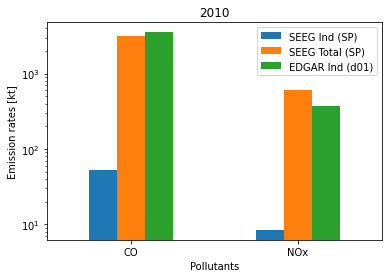

In [20]:
SEEG = {'Pollutants':['CO','NOx'],
        'SEEG Ind (SP)':[SEEG_ind['2010']['CO']['SP'],SEEG_ind['2010']['NOx']['SP']],
        'SEEG Total (SP)':[SEEG_SP['2010']['CO'],SEEG_SP['2010']['NOx']],
        'EDGAR Ind (d01)':[emi['d01']['ind']['CO'],emi['d01']['ind']['NOx']]}

fig, ax = plt.subplots()
pd.DataFrame(SEEG).set_index('Pollutants').plot(kind='bar',logy=True, title='2010',rot=0, ax=ax)
ax.set_ylabel('Emission rates [kt]')
fig.savefig('Emi_Ind_2010.pdf',bbox_inches='tight');

<AxesSubplot:>

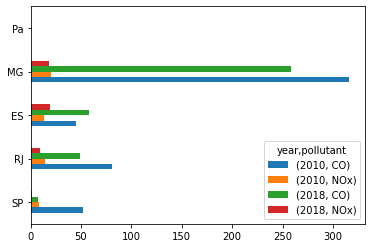

In [21]:
SEEG_ind.plot(kind='barh')
#fig, ax = plt.subplots()
#pd.DataFrame(SEEG_2018_ind).set_index('Pollutants').plot(kind='barh', ax=ax)
#plt.title('Industrial sources (2018)')
#fig.savefig("SEEG_2018_ind.pdf",bbox_inches='tight')

In [22]:
compar = {'2010':{'EDGAR (2010)':{'CO':emi['d01']['ind']['CO'], 'NOx':emi['d01']['ind']['NOx']},
                  'SEEG (2010)':{'CO':SEEG_ind.sum()['2010']['CO'],'NOx':SEEG_ind.sum()['2010']['NOx']}},
          '2018':{'EDGAR (2010)':{'CO':emi['d01']['ind']['CO'], 'NOx':emi['d01']['ind']['NOx']},
                  'SEEG (2018)':{'CO':SEEG_ind.sum()['2018']['CO'],'NOx':SEEG_ind.sum()['2018']['NOx']}
                 }}

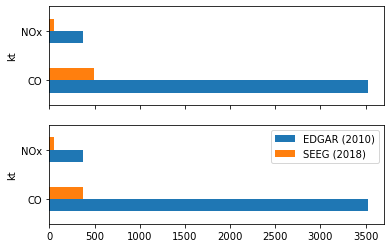

In [23]:
fig, ax = plt.subplots(2,sharex=True, subplot_kw={'ylabel':'kt'})
pd.DataFrame(compar['2010']).plot(kind='barh',ax=ax[0], legend=False)
pd.DataFrame(compar['2018']).plot(kind='barh',ax=ax[1])
fig.savefig('Edgar_SEEG_ind.pdf',bbox_inches='tight')